<a href="https://colab.research.google.com/github/VarshaChanumolu/ASL-Alphabet-Classification-using-Deep-Learning/blob/main/ASL%20Classification%20-%20ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd

from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
%cd /content/drive/My Drive/Projects/Project_DL

Mounted at /content/drive
/content/drive/My Drive/Projects/Project_DL


In [ ]:
traindir = "./asl_alphabet_train(200x200)"
testdir = "./asl_alphabet_test(200x200)/asl_alphabet_test"

In [ ]:
uniq_labels = sorted(os.listdir(traindir))

In [ ]:
def load_data(trainDir,uniqueLabels, size):
    images = []
    labels = []
    #size = 32,32
    for idx, label in enumerate(uniqueLabels):
        for file in os.listdir(trainDir  +"/" + label):
          filepath = trainDir + "/" + label + "/" + file
          image = cv2.resize(cv2.imread(filepath), size)
          images.append(image)
          labels.append(idx)
        print(label)
    images = np.array(images)
    labels = np.array(labels)
    return(images, labels)

In [ ]:
images, labels = load_data(traindir,uniq_labels, (48,48))

A
B
C
D
E
F
G
H
I
J
K
L
M
N
O
P
Q
R
S
T
U
V
W
X
Y
Z
del
space


In [ ]:
X_test, y_test = load_data(testdir,uniq_labels,(48,48))

A
B
C
D
E
F
G
H
I
J
K
L
M
N
O
P
Q
R
S
T
U
V
W
X
Y
Z
del
space


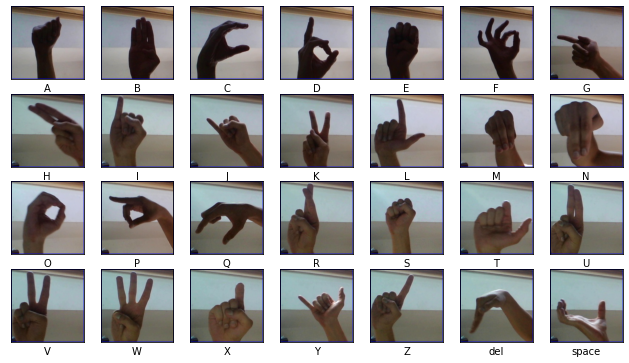

In [ ]:
classes = ['A','B','C','D','E','F',
           'G','H','I','J','K','L','M','N',
           'O','P','Q','R','S','T','U','V',
           'W','X','Y','Z','del','space']

plt.figure(figsize=(11, 11))
for i in range (0,28):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    path = traindir + "/{0}/{0}1.jpg".format(classes[i])
    img = plt.imread(path)
    plt.imshow(img)
    plt.xlabel(classes[i])

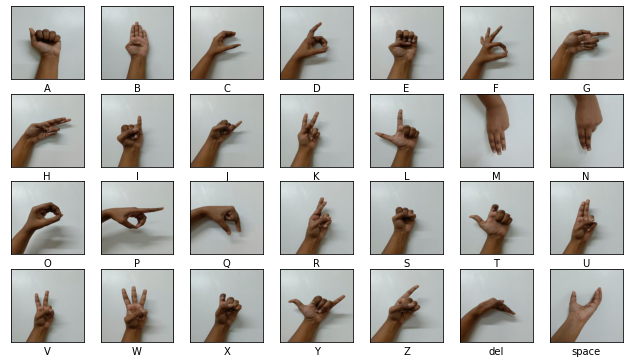

In [ ]:
plt.figure(figsize=(11, 11))
for i in range (0,28):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    path = testdir + "/{0}/{0}5.jpg".format(classes[i])
    img = plt.imread(path)
    plt.imshow(img)
    plt.xlabel(classes[i])

In [ ]:
X_train, X_eval, y_train, y_eval = train_test_split(images, labels, test_size = 0.3, stratify = labels)

In [ ]:
train_n = len(X_train)
test_n = len(X_test)
eval_n = len(X_eval)
print("Number of training images: " , train_n)
print("Number of testing images: ", test_n)


print("Number of evaluation images: ", eval_n)

Number of training images:  58800
Number of testing images:  252
Number of evaluation images:  25200


In [ ]:
y_train = tensorflow.keras.utils.to_categorical(y_train)
y_test = tensorflow.keras.utils.to_categorical(y_test)
y_eval = tensorflow.keras.utils.to_categorical(y_eval)
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0
X_eval = X_eval.astype('float32')/255.0

In [ ]:
def results(model,history, x_test, y_test):
  #rmsProp = tensorflow.keras.optimizers.RMSprop()

  #model.compile(optimizer=rmsProp, loss='categorical_crossentropy', metrics=['accuracy'])

  #history = model.fit(x_train, y_train, batch_size=batch, epochs=epochs, validation_split=0.1, shuffle = True, verbose=1)
  

  #model.summary()

  plt.figure(figsize=(12, 12))
  plt.subplot(3, 2, 1)
  plt.plot(history.history['accuracy'], label = 'train_accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.subplot(3, 2, 2)
  plt.plot(history.history['loss'], label = 'train_loss')
  plt.plot(history.history['val_loss'], label = 'val_loss')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend()
  test_loss, test_acc = model.evaluate( x_test, y_test)
  print('Test accuracy:', test_acc)
  print('Test loss:', test_loss)

In [ ]:
def plot_confusion_matrix(y, y_pred):
    y = np.argmax(y, axis = 1)
    y_pred = np.argmax(y_pred, axis = 1)
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize = (15, 15))
    ax = plt.subplot()
    plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Purples)
    plt.colorbar()
    plt.title("Confusion Matrix")
    tick_marks = np.arange(len(uniq_labels))
    plt.xticks(tick_marks, uniq_labels, rotation=45)
    plt.yticks(tick_marks, uniq_labels)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    ax.title.set_fontsize(20)
    ax.xaxis.label.set_fontsize(16)
    ax.yaxis.label.set_fontsize(16)
    limit = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment = "center",color = "white" if cm[i, j] > limit else "black")
    plt.show()

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
resModel2 = ResNet50(include_top = False, input_shape = (48, 48,3), weights = 'imagenet')

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
#for l in resModel2.layers[:143]:
 # l.trainable = False
#resModel2.trainable = False

In [ ]:
resModel2.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 54, 54, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 24, 24, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 24, 24, 64)   256         ['conv1_conv[0][0]']             
                                                                                           

In [ ]:
for i, l in enumerate(resModel2.layers):
  print(i, l.name, " - ", l.trainable)

0 input_1  -  True
1 conv1_pad  -  True
2 conv1_conv  -  True
3 conv1_bn  -  True
4 conv1_relu  -  True
5 pool1_pad  -  True
6 pool1_pool  -  True
7 conv2_block1_1_conv  -  True
8 conv2_block1_1_bn  -  True
9 conv2_block1_1_relu  -  True
10 conv2_block1_2_conv  -  True
11 conv2_block1_2_bn  -  True
12 conv2_block1_2_relu  -  True
13 conv2_block1_0_conv  -  True
14 conv2_block1_3_conv  -  True
15 conv2_block1_0_bn  -  True
16 conv2_block1_3_bn  -  True
17 conv2_block1_add  -  True
18 conv2_block1_out  -  True
19 conv2_block2_1_conv  -  True
20 conv2_block2_1_bn  -  True
21 conv2_block2_1_relu  -  True
22 conv2_block2_2_conv  -  True
23 conv2_block2_2_bn  -  True
24 conv2_block2_2_relu  -  True
25 conv2_block2_3_conv  -  True
26 conv2_block2_3_bn  -  True
27 conv2_block2_add  -  True
28 conv2_block2_out  -  True
29 conv2_block3_1_conv  -  True
30 conv2_block3_1_bn  -  True
31 conv2_block3_1_relu  -  True
32 conv2_block3_2_conv  -  True
33 conv2_block3_2_bn  -  True
34 conv2_block3_2_relu

In [ ]:
model2 = tensorflow.keras.models.Sequential()
model2.add(resModel2)
model2.add(tensorflow.keras.layers.Flatten())
#model2.add(tensorflow.keras.layers.Dense(512, activation="relu"))
#model2.add(tensorflow.keras.layers.Dropout(0.5))
model2.add(tensorflow.keras.layers.Dense(128, activation="relu"))
model2.add(tensorflow.keras.layers.Dropout(0.5))
model2.add(tensorflow.keras.layers.Dense(28, activation="softmax"))

In [ ]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2, 2, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 128)               1048704   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 28)                3612      
                                                                 
Total params: 24,640,028
Trainable params: 24,586,908
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
model2.compile(optimizer = "adam",
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [ ]:
history2 = model2.fit(X_train, y_train, epochs = 30, batch_size = 64, validation_data = (X_eval, y_eval))

Epoch 1/30
919/919 [==============================] - 174s 170ms/step - loss: 1.0497 - accuracy: 0.7023 - val_loss: 1.4173 - val_accuracy: 0.5777
Epoch 2/30
919/919 [==============================] - 153s 167ms/step - loss: 0.3182 - accuracy: 0.9151 - val_loss: 2.2148 - val_accuracy: 0.5160
Epoch 3/30
919/919 [==============================] - 153s 166ms/step - loss: 0.3806 - accuracy: 0.8937 - val_loss: 0.9795 - val_accuracy: 0.7418
Epoch 4/30
919/919 [==============================] - 153s 167ms/step - loss: 0.2480 - accuracy: 0.9325 - val_loss: 0.8912 - val_accuracy: 0.8109
Epoch 5/30
919/919 [==============================] - 154s 167ms/step - loss: 0.2360 - accuracy: 0.9422 - val_loss: 0.4291 - val_accuracy: 0.9078
Epoch 6/30
919/919 [==============================] - 154s 167ms/step - loss: 0.1506 - accuracy: 0.9602 - val_loss: 3.7454 - val_accuracy: 0.4051
Epoch 7/30
919/919 [==============================] - 158s 172ms/step - loss: 0.1897 - accuracy: 0.9474 - val_loss: 0.4035 -

In [ ]:
model2.save("resNet50.h5")

8/8 [==============================] - 1s 93ms/step - loss: 13.4377 - accuracy: 0.1905
Test accuracy: 0.190476194024086
Test loss: 13.437742233276367


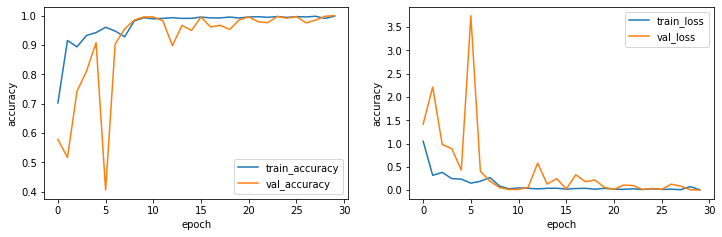

In [ ]:
results(model2,history2, X_test, y_test)

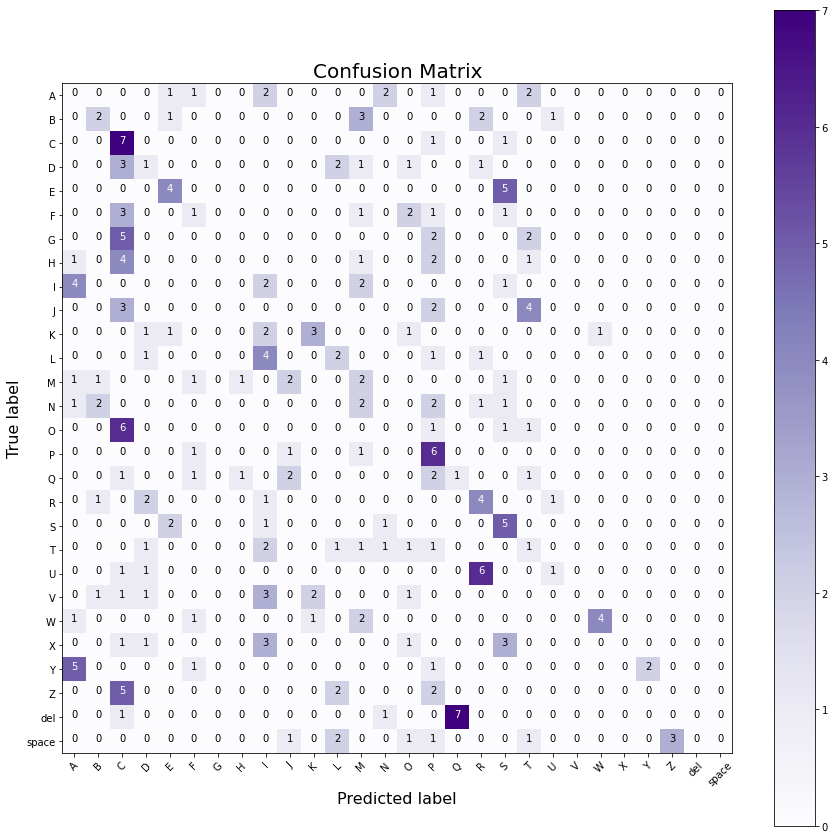

In [ ]:
y_test_pred2 = model2.predict(X_test, batch_size = 64, verbose = 0)
plot_confusion_matrix(y_test, y_test_pred2)

788/788 [==============================] - 28s 35ms/step - loss: 0.0013 - accuracy: 0.9998
Test accuracy: 0.9998412728309631
Test loss: 0.0012736634816974401


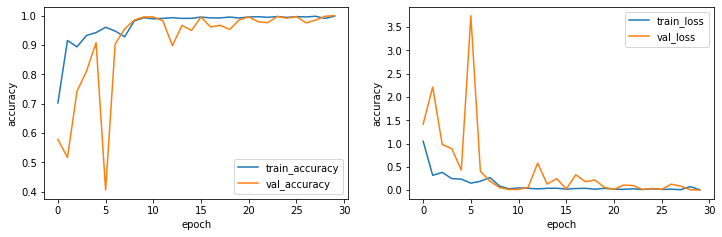

In [ ]:
results(model2,history2, X_eval, y_eval)

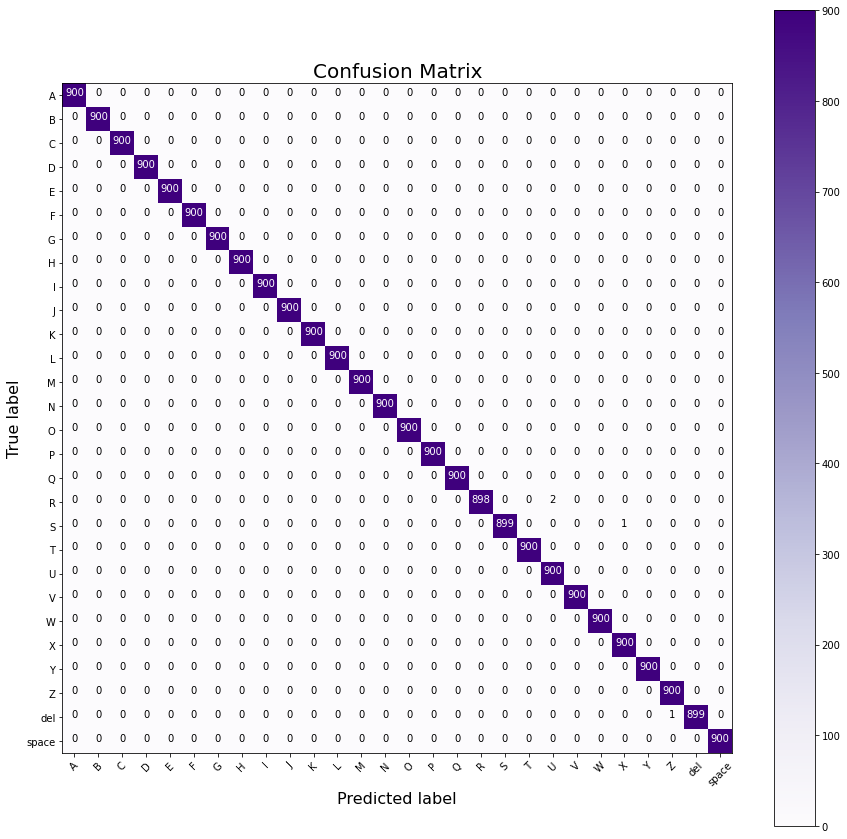

In [ ]:
y_test_pred3 = model2.predict(X_eval, batch_size = 64, verbose = 0)
plot_confusion_matrix(y_eval, y_test_pred3)